In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('/content/brain_tumor_dataset.csv')

In [4]:
df.head(5)

,Tumor Type,Location,Size (cm),Grade,Patient Age,Gender
0,Oligodendroglioma,Occipital Lobe,9.23,I,48,Female
1,Ependymoma,Occipital Lobe,0.87,II,47,Male
2,Meningioma,Occipital Lobe,2.33,II,12,Female
3,Ependymoma,Occipital Lobe,1.45,III,38,Female
4,Ependymoma,Brainstem,6.45,I,35,Female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tumor Type   1000 non-null   object 
 1   Location     1000 non-null   object 
 2   Size (cm)    1000 non-null   float64
 3   Grade        1000 non-null   object 
 4   Patient Age  1000 non-null   int64  
 5   Gender       1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [6]:
df.describe()

,Size (cm),Patient Age
count,1000.000000,1000.000000
mean,5.221500,43.519000
std,2.827318,25.005818
min,0.510000,1.000000
25%,2.760000,22.000000
50%,5.265000,43.000000
75%,7.692500,65.000000
max,10.000000,89.000000


In [7]:
df.isnull().sum()

,0
Tumor Type,0
Location,0
Size (cm),0
Grade,0
Patient Age,0
Gender,0


Index(['Tumor Type', 'Location', 'Size (cm)', 'Grade', 'Patient Age',
       'Gender'],
      dtype='object')


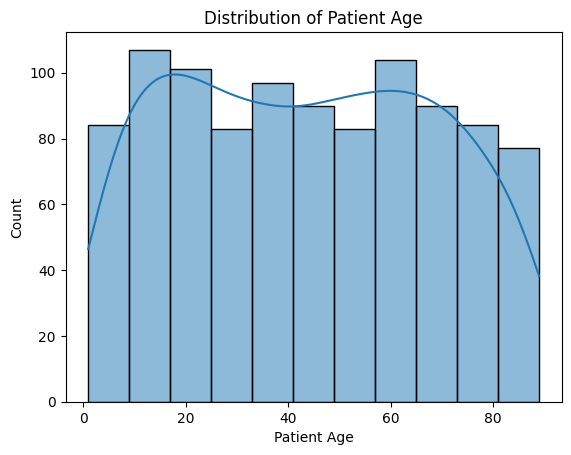

In [12]:
print(df.columns)
sns.histplot(df['Patient Age'], kde=True)
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.title('Distribution of Patient Age')
plt.show()

<ipython-input-14-fb15d94a4b4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tumor Type', y='Size (cm)', data=df, palette='pastel')


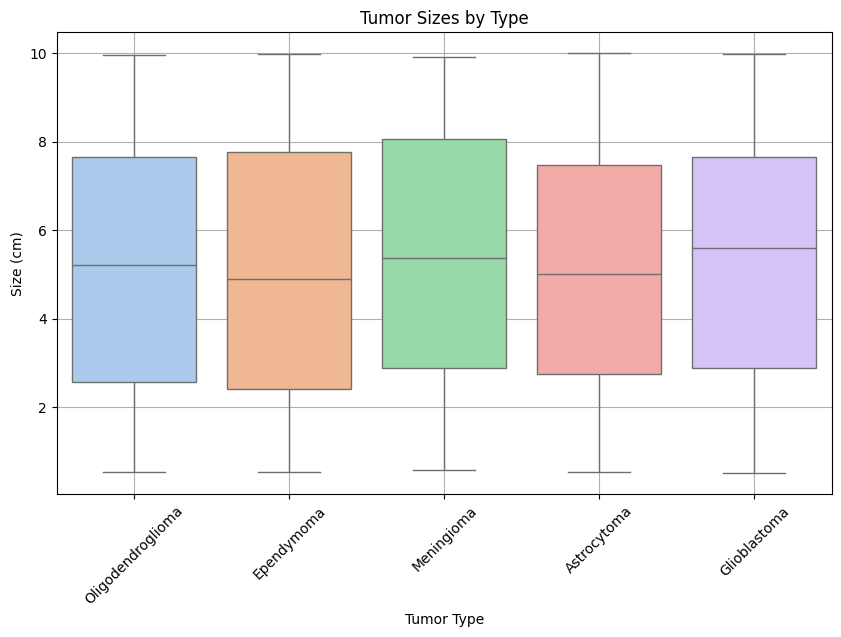

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tumor Type', y='Size (cm)', data=df, palette='pastel')
plt.title('Tumor Sizes by Type')
plt.xticks(rotation=45)
plt.xlabel('Tumor Type')
plt.ylabel('Size (cm)')
plt.grid(True)
plt.show()

<ipython-input-18-2da325bde4c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tumor Type', data=df, palette='Set3')


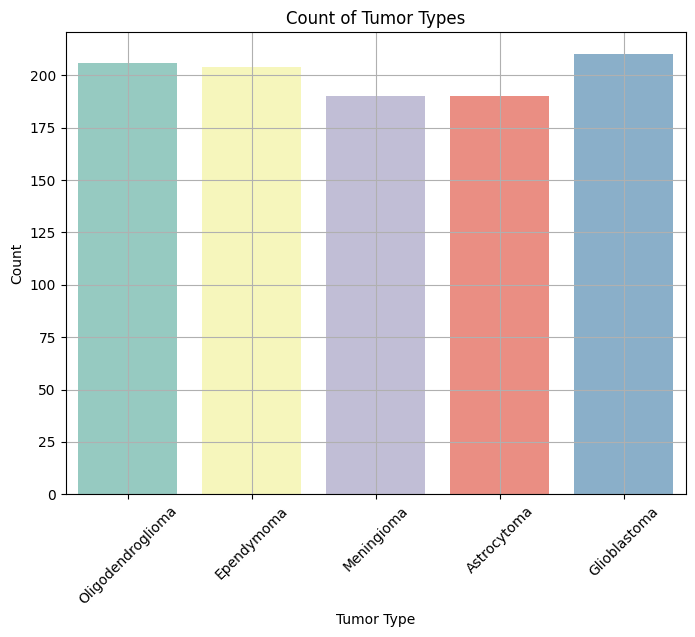

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Tumor Type', data=df, palette='Set3')
plt.title('Count of Tumor Types')
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

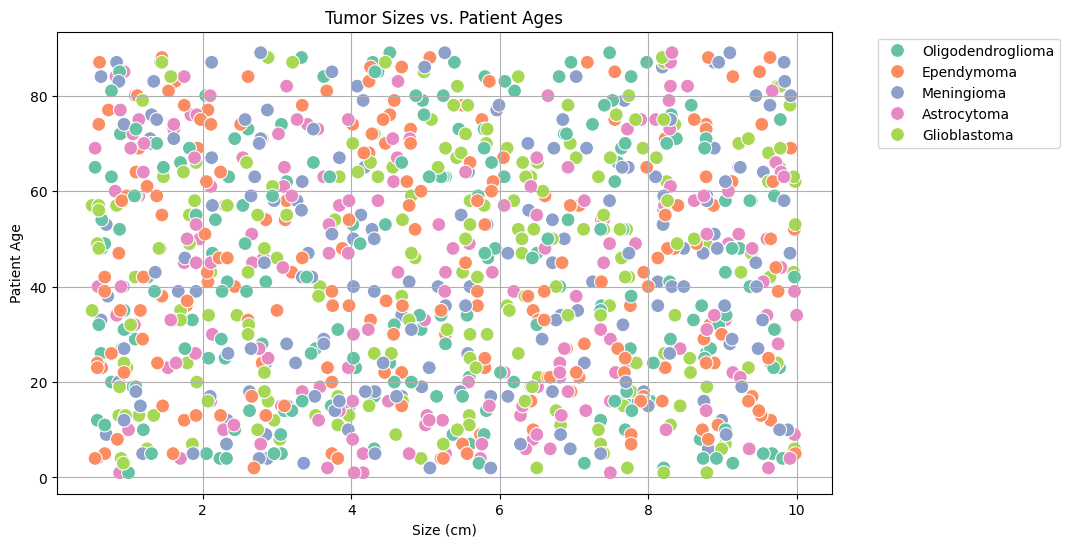

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size (cm)', y='Patient Age', hue='Tumor Type', data=df, palette='Set2', s=100)
plt.title('Tumor Sizes vs. Patient Ages')
plt.xlabel('Size (cm)')
plt.ylabel('Patient Age')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

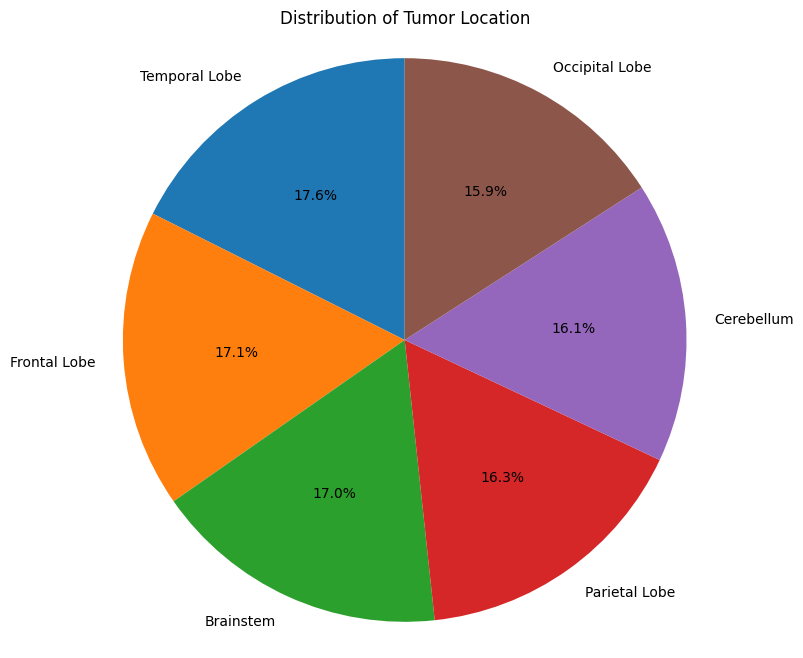

In [23]:
location_counts = df['Location'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Tumor Location')
plt.axis('equal')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tumor Type   1000 non-null   object 
 1   Location     1000 non-null   object 
 2   Size (cm)    1000 non-null   float64
 3   Grade        1000 non-null   object 
 4   Patient Age  1000 non-null   int64  
 5   Gender       1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [27]:
le = LabelEncoder()
df['Tumor Type'] = le.fit_transform(df['Tumor Type'])
df['Location'] = le.fit_transform(df['Location'])
df['Grade'] = le.fit_transform(df['Grade'])
df['Gender'] = le.fit_transform(df['Gender'])

In [30]:
X=df[['Tumor Type','Location','Size (cm)','Patient Age','Grade','Gender']]
y=df['Tumor Type']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [52]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
y_pred = model.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Accuracy
accuracy_score(y_test, y_pred)
# Confusion matrix
confusion_matrix(y_test, y_pred)
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        37

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



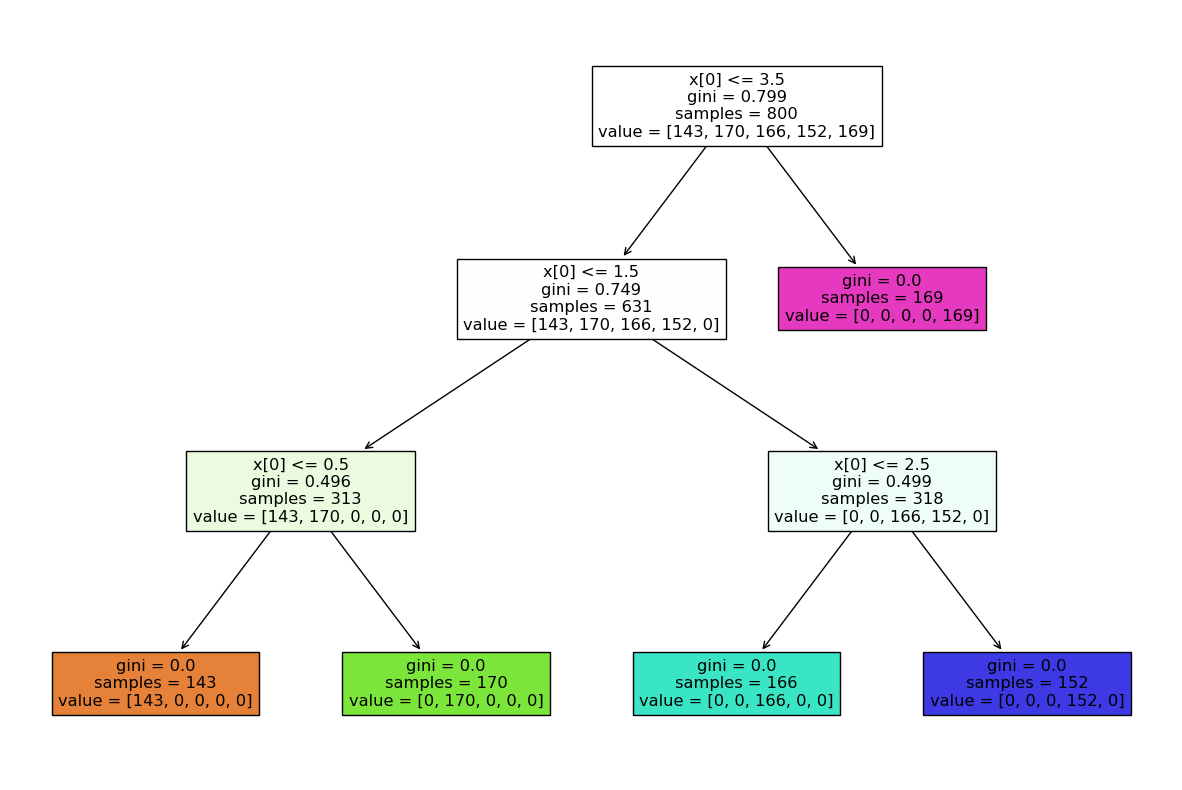

In [58]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()